# Cálculo de ratios

Cálculo de los ratios financieros a partir de la información contable y bursátil disponible, que utilizaremos como variables explicativas del modelo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 50

In [3]:
! ls -n ../tablas

total 29488
-rw-rw-r-- 1 1000 1000  8443012 sep  5 14:57 dataformodel.csv
-rw-rw-r-- 1 1000 1000    76982 sep  4 16:37 filteredcompanies.csv
-rw-rw-r-- 1 1000 1000 13719490 sep  4 16:37 mergedbalres.csv
-rw-rw-r-- 1 1000 1000  7921206 sep  4 19:42 registros_etiq.csv
-rw-rw-r-- 1 1000 1000     6271 sep  5 14:29 result_carteras.csv
-rw-rw-r-- 1 1000 1000     2057 ago 31 11:21 var_indice.csv
-rw-rw-r-- 1 1000 1000     1646 sep  4 19:44 var_indice_energy.csv
-rw-rw-r-- 1 1000 1000     1771 sep  4 19:44 var_indice_health.csv
-rw-rw-r-- 1 1000 1000     1795 sep  4 19:44 var_indice_ind.csv
-rw-rw-r-- 1 1000 1000     1761 sep  4 19:44 var_indice_tec.csv


In [4]:
data = pd.read_csv('../tablas/registros_etiq.csv', usecols=['Ticker', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity',
       'Revenue', 'Cost of Revenue', 'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Research & Development',
       'Depreciation & Amortization', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income', 'Net Income (Common)',
       'Periodo', 'Price_d', 'Price_d_100', 'Publish_Date+180', 'Price_d+180',
       'Price_d+180_100', 'Indice_d_100', 'Indice_d+180_100', 'Var_cotiz',
       'Var_index', 'Etiqueta','Sector'])

In [5]:
len(data)

12706

In [6]:
list(data.columns)

['Ticker',
 'SimFinId',
 'Currency',
 'Fiscal Year',
 'Fiscal Period',
 'Report Date',
 'Publish Date',
 'Restated Date',
 'Shares (Basic)',
 'Shares (Diluted)',
 'Cash, Cash Equivalents & Short Term Investments',
 'Accounts & Notes Receivable',
 'Inventories',
 'Total Current Assets',
 'Property, Plant & Equipment, Net',
 'Long Term Investments & Receivables',
 'Other Long Term Assets',
 'Total Noncurrent Assets',
 'Total Assets',
 'Payables & Accruals',
 'Short Term Debt',
 'Total Current Liabilities',
 'Long Term Debt',
 'Total Noncurrent Liabilities',
 'Total Liabilities',
 'Share Capital & Additional Paid-In Capital',
 'Treasury Stock',
 'Retained Earnings',
 'Total Equity',
 'Total Liabilities & Equity',
 'Sector',
 'Revenue',
 'Cost of Revenue',
 'Gross Profit',
 'Operating Expenses',
 'Selling, General & Administrative',
 'Research & Development',
 'Depreciation & Amortization',
 'Operating Income (Loss)',
 'Non-Operating Income (Loss)',
 'Interest Expense, Net',
 'Pretax Incom

### Capitalización bursátil

In [7]:
data['Capit']=data['Shares (Basic)']*data['Price_d']
len(data[data['Capit'].isnull()])

62

### PER

In [8]:
data['PER'] = data['Capit']/data['Net Income (Common)']
len(data[data['PER'].isnull()])

62

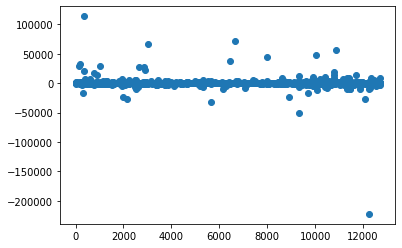

In [9]:
plt.scatter( data.index, data["PER"]);

In [10]:
outliers=data[(data.PER<-3000) | (data.PER>3000)]
outliers.Ticker.unique()

array(['CLR', 'CXO', 'DRQ', 'EOG', 'HAL', 'MDR', 'MPC', 'MRC', 'NOV',
       'PXD', 'SMLP', 'ABBV', 'ABMC', 'BABY', 'BMRN', 'BMY', 'BSX',
       'CORT', 'CRY', 'ENZ', 'EW', 'GHDX', 'GILD', 'ICUI', 'ITGR', 'LH',
       'MYGN', 'NEO', 'PODD', 'RGEN', 'TFX', 'ALLE', 'ATI', 'AZZ', 'BCO',
       'CLH', 'CUB', 'CUO', 'FORR', 'GE', 'HCSG', 'IRM', 'ISSC', 'JEC',
       'MIC', 'PESI', 'TITN', 'AEHR', 'AMOT', 'AXTI', 'CRM', 'EIGI',
       'EXTR', 'FEYE', 'FLIR', 'FTNT', 'GLUU', 'GRPN', 'GWRE', 'IBM',
       'ITRI', 'IVAC', 'KLIC', 'LOGM', 'MDSO', 'MEET', 'MITK', 'NOW',
       'NPTN', 'NUAN', 'OMCL', 'ON', 'OSIS', 'PANW', 'RP', 'SMSI', 'SMTC',
       'SNPS', 'STMP', 'TTGT', 'TWOU', 'VDSI', 'VRNT', 'VRTU', 'YELP',
       'ZNGA'], dtype=object)

In [11]:
data=data[~data.Ticker.isin(list(outliers.Ticker.unique()))]

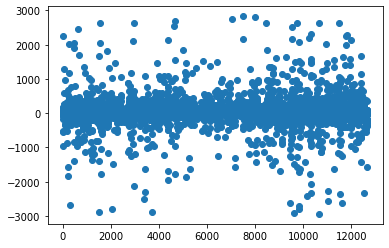

In [12]:
plt.scatter( data.index, data["PER"]);

### Price / Book Value

In [13]:
data['PBC'] = data['Capit']/data['Total Equity']
len(data[data['PBC'].isnull()])

62

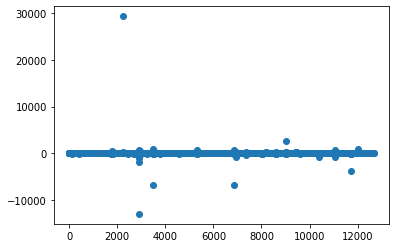

In [14]:
plt.scatter( data.index, data["PBC"]);

In [15]:
outliers=data[(data.PBC<-10) | (data.PBC>40)]
outliers.Ticker.unique()

array(['CHK', 'CRZO', 'EGY', 'ACRX', 'ARRY', 'AVEO', 'AXGN', 'CLRB',
       'CRIS', 'CSBR', 'CTIC', 'ENDP', 'GTXI', 'HALO', 'HCA', 'ICPT',
       'IDXX', 'INCY', 'IQV', 'LXRX', 'MNKD', 'NEPH', 'NKTR', 'NVAX',
       'OPHT', 'PBYI', 'PTN', 'RDNT', 'TNDM', 'ZGNX', 'ZIOP', 'AAL',
       'AJRD', 'BA', 'LII', 'LMT', 'PAYS', 'PBI', 'SABR', 'TNET', 'UPS',
       'VRSK', 'ADSK', 'AMD', 'BNFT', 'CSOD', 'DBD', 'EGAN', 'ENPH',
       'HEAR', 'IT', 'MSI', 'MVIS', 'PAYC', 'QCOM', 'RST', 'SSNT', 'UBNT',
       'VRSN', 'WATT'], dtype=object)

In [16]:
data=data[~data.Ticker.isin(list(outliers.Ticker.unique()))]

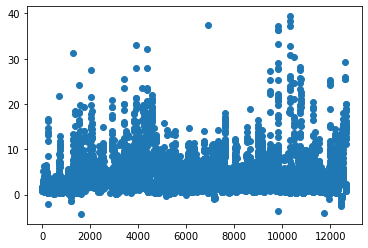

In [17]:
plt.scatter( data.index, data["PBC"]);

### ROE

In [18]:
data['ROE'] = data['Net Income (Common)']/data['Total Equity']
len(data[data['ROE'].isnull()])

0

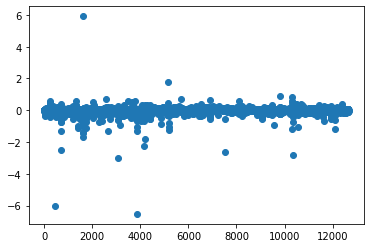

In [19]:
plt.scatter( data.index, data["ROE"]);

In [20]:
outliers=data[(data.ROE<-2) | (data.ROE>2)]
outliers.Ticker.unique()

array(['EPE', 'IO', 'AMDA', 'KOOL', 'RGLS', 'TGTX', 'RCII', 'IPDN'],
      dtype=object)

In [21]:
data=data[~data.Ticker.isin(list(outliers.Ticker.unique()))]

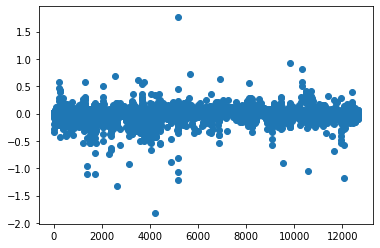

In [22]:
plt.scatter( data.index, data["ROE"]);

### ROA

In [23]:
data['ROA'] = data['Net Income (Common)']/data['Total Assets']
len(data[data['ROA'].isnull()])

0

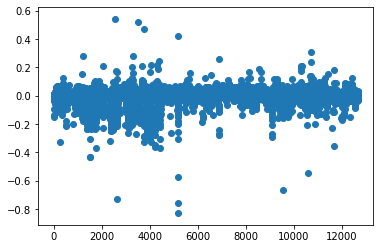

In [24]:
plt.scatter( data.index, data["ROA"]);

In [25]:
outliers=data[(data.ROA<-0.4) | (data.ROA>0.4)]
outliers.Ticker.unique()

array(['AKER', 'FPRX', 'GLYC', 'NLNK', 'PSDV', 'ASTC', 'DDD', 'LEDS'],
      dtype=object)

In [26]:
data=data[~data.Ticker.isin(list(outliers.Ticker.unique()))]

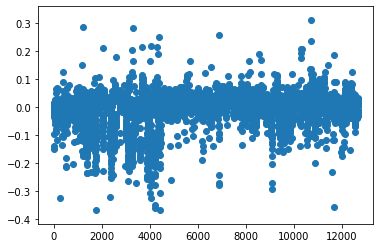

In [27]:
plt.scatter( data.index, data["ROA"]);

In [28]:
len(data)

9350

### Deuda total / FFPP

In [29]:
data['Deuda_FFPP'] = (data['Short Term Debt'] + data['Long Term Debt'])/data['Total Equity']
len(data[data['Deuda_FFPP'].isnull()])

3520

### Deuda corto plazo / FFPP

In [30]:
data['DeudaCP_FFPP'] = data['Short Term Debt'] / data['Total Equity']
len(data[data['DeudaCP_FFPP'].isnull()])

3273

## Variaciones en los ratios

A continuación vamos a incorporar como variable la variación de cada ratio con respecto al periodo anterior. Para ello primero aseguramos el orden adecuado de la tabla

In [31]:
data.sort_values(['Ticker','Fiscal Year','Fiscal Period'], ascending=True, inplace=True)

Despues incorporamos en cada fila el valor del ratio del periodo anterior, siempre que el Ticker no varíe.

In [32]:
#Definimos una función que genere subtablas por Ticker y en ellas haga un shift para incorporar en cada línea el
#valor de un ratio dado del periodo anterior.

def ratio_ant(ratio,data):
    table_1=pd.DataFrame()
    for ticker in data.Ticker.unique():
        aux_table=data[data.Ticker==ticker]
        aux_table['var_%s'%(ratio)]=(aux_table[ratio].shift(1)/aux_table[ratio])-1
        table_1=table_1.append(aux_table)
    return table_1

In [33]:
#Aplicamos la función anterior para cada ratio

for column in ['PER','PBC','ROE','ROA','Deuda_FFPP','DeudaCP_FFPP']:
    data=ratio_ant(column,data)

## Valor relativo de cada ratio

Una posible mejora del modelo consiste en considerar cada uno de los ratios no por su valor absoluto, sino como un valor relativo con respecto al resto de compañias del periodo.
Para ello vamos a obtener para cada periodo el percentil que ocupa cada ratio de cada compañía con respecto a las demás.

In [34]:
data.head(4)

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,Sector,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Periodo,Price_d,Price_d_100,Publish_Date+180,Price_d+180,Price_d+180_100,Indice_d_100,Indice_d+180_100,Var_cotiz,Var_index,Etiqueta,Capit,PER,PBC,ROE,ROA,Deuda_FFPP,DeudaCP_FFPP,var_PER,var_PBC,var_ROE,var_ROA,var_Deuda_FFPP,var_DeudaCP_FFPP
4588,AAN,441241,USD,2013,Q4,2013-12-31,2014-02-24,2015-03-02,75226000.0,75721000.0,231091000.0,68684000.0,8.697250e+08,1.191541e+09,231293000.0,112391000.0,291951000.0,6.356350e+08,1827176000,272310000.0,NaN,499268000.0,142704000.0,187945000.0,687213000,243558000.0,-305750000.0,1.202219e+09,1.139963e+09,1827176000,Industrials,553852000.0,-256458000.0,297394000.0,-263509000.0,NaN,NaN,NaN,33885000.0,226000.0,-340000.0,34111000.0,NaN,34111000.0,-11437000.0,22674000.0,NaN,22674000.0,22674000.0,2013Q4,29.93,110.646950,2014-08-23,25.61,94.676525,118.685481,123.677241,-0.144337,0.042059,Peor,2.251514e+09,99.299382,1.975077,0.019890,0.012409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4589,AAN,441241,USD,2014,Q1,2014-03-31,2014-05-09,2014-05-09,72467000.0,72884000.0,290680000.0,60863000.0,8.718610e+08,1.229833e+09,230792000.0,106441000.0,294164000.0,6.313970e+08,1861230000,298620000.0,NaN,498441000.0,142053000.0,183774000.0,682215000,267258000.0,-327216000.0,1.239041e+09,1.179015e+09,1861230000,Industrials,585423000.0,-259832000.0,325591000.0,-262022000.0,NaN,NaN,NaN,63569000.0,-1184000.0,-780000.0,62385000.0,-1675000.0,60710000.0,-22371000.0,38339000.0,NaN,38339000.0,38339000.0,2014Q1,31.51,116.487985,2014-11-05,24.78,91.608133,117.570635,124.318469,-0.213583,0.057394,Peor,2.283435e+09,59.559070,1.936731,0.032518,0.020599,NaN,NaN,0.667242,0.019799,-0.388332,-0.397569,NaN,NaN
4590,AAN,441241,USD,2014,Q2,2014-06-30,2014-08-08,2014-08-08,72246000.0,72598000.0,17571000.0,79480000.0,1.038148e+09,1.140398e+09,227941000.0,92926000.0,908222000.0,1.229089e+09,2369487000,305057000.0,NaN,516877000.0,612663000.0,663822000.0,1180699000,268501000.0,-325685000.0,1.246029e+09,1.188788e+09,2369487000,Industrials,662490000.0,-314420000.0,348070000.0,-311121000.0,NaN,NaN,NaN,36949000.0,-3255000.0,-4405000.0,33694000.0,-20132000.0,13562000.0,-5057000.0,8505000.0,NaN,8505000.0,8505000.0,2014Q2,24.79,91.645102,2015-02-04,30.92,114.306839,119.351069,125.633500,0.247277,0.052638,Mejor,1.790978e+09,210.579464,1.506558,0.007154,0.003589,NaN,NaN,-0.717166,0.285534,3.545185,4.738796,NaN,NaN
4591,AAN,441241,USD,2014,Q3,2014-09-30,2014-11-05,2014-11-05,72340000.0,72660000.0,10401000.0,89821000.0,1.036407e+09,1.143674e+09,224301000.0,21704000.0,898249000.0,1.144254e+09,2287928000,294104000.0,NaN,477984000.0,557237000.0,608698000.0,1086682000,271104000.0,-323582000.0,1.253807e+09,1.201246e+09,2287928000,Industrials,698418000.0,-337631000.0,360787000.0,-324951000.0,NaN,NaN,NaN,35836000.0,-5911000.0,-5528000.0,29925000.0,-16726000.0,13199000.0,-3904000.0,9295000.0,NaN,9295000.0,9295000.0,2014Q3,24.78,91.608133,2015-05-04,34.15,126.247689,124.318469,132.218213,0.378128,0.063544,Mejor,1.792585e+09,192.854782,1.492272,

In [35]:
data = data.astype({'Fiscal Year':str})
data['Periodo'] = data['Fiscal Year'] + data['Fiscal Period']

In [36]:
len(data)

9350

In [37]:
#Definimos una función que genere subtablas por periodo y cada una calcule el cuantil de cada ratio de cada
#compañia

In [38]:
from scipy import stats

def my_quantile(ratio,data):
    table_1=pd.DataFrame()
    
    for periodo in data.Periodo.unique():
        aux_table=data[data.Periodo==periodo]
        aux_table['quantile_%s'%(ratio)]=0       
        
        for row in range(0,len(aux_table)):
            aux_table['quantile_%s'%(ratio)].iloc[row]=stats.percentileofscore(aux_table[ratio],
                                                                               aux_table[ratio].iloc[row])
        
        table_1=table_1.append(aux_table)
            
    return table_1

In [39]:
#Aplicamos la función anterior para cada ratio

for column in ['PER','PBC','ROE','ROA','Deuda_FFPP','DeudaCP_FFPP']:
    data=my_quantile(column,data)

## Variaciones en los cuantiles

A continuación vamos a incorporar como variable la variación de cada percentil con respecto al periodo anterior. Para ello primero aseguramos el orden adecuado de la tabla

In [40]:
data.sort_values(['Ticker','Fiscal Year','Fiscal Period'], ascending=True, inplace=True)

Despues incorporamos en cada fila el valor del ratio del periodo anterior, siempre que el Ticker no varíe.

In [41]:
#Definimos una función que genere subtablas por Ticker y en ellas haga un shift para incorporar en cada línea el
#valor de un cuantil dado del periodo anterior.

def ratio_ant(ratio,data):
    table_1=pd.DataFrame()
    for ticker in data.Ticker.unique():
        aux_table=data[data.Ticker==ticker]
        aux_table['var_%s'%(ratio)]=(aux_table[ratio]-aux_table[ratio].shift(1))
        table_1=table_1.append(aux_table)
    return table_1

In [42]:
#Aplicamos la función anterior para cada ratio

for column in ['quantile_PER','quantile_PBC','quantile_ROE','quantile_ROA','quantile_DeudaCP_FFPP']:
    data=ratio_ant(column,data)

In [43]:
data[data.Ticker=='MRO'].head(10)

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,Sector,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Periodo,Price_d,Price_d_100,Publish_Date+180,Price_d+180,Price_d+180_100,Indice_d_100,Indice_d+180_100,Var_cotiz,Var_index,Etiqueta,Capit,PER,PBC,ROE,ROA,Deuda_FFPP,DeudaCP_FFPP,var_PER,var_PBC,var_ROE,var_ROA,var_Deuda_FFPP,var_DeudaCP_FFPP,quantile_PER,quantile_PBC,quantile_ROE,quantile_ROA,quantile_Deuda_FFPP,quantile_DeudaCP_FFPP,var_quantile_PER,var_quantile_PBC,var_quantile_ROE,var_quantile_ROA,var_quantile_DeudaCP_FFPP
805,MRO,378185,USD,2013,Q4,2013-12-31,2014-02-28,2015-03-02,695000000.0,699000000.0,2.640000e+08,2.134000e+09,364000000.0,2.975000e+09,2.814500e+10,1.201000e+09,3.299000e+09,3.264500e+10,35620000000,3.891000e+09,2.030000e+08,4.333000e+09,6.394000e+09,1.194300e+10,16276000000,7.362000e+09,-2.903000e+09,1.513500e+10,1.934400e+10,35620000000,Energy,1.646000e+09,-500000000.0,1.146000e+09,-1.564000e+09,-675000000.0,-220000000.0,-497000000.0,-418000000.0,-68000000.0,-68000000.0,-486000000.0,-47000000.0,-5.330000e+08,447000000.0,-86000000.0,4.610000e+08,3.750000e+08,3.750000e+08,2013Q4,30.05,96.654873,2014-08-27,37.08,119.266645,109.637285,124.523691,0.233943,0.135779,Mejor,2.088475e+10,55.692667,1.079650,0.019386,0.010528,0.341036,0.010494,NaN,NaN,NaN,NaN,NaN,NaN,38.964578,8.174387,35.694823,38.692098,24.250681,19.346049,NaN,NaN,NaN,NaN,NaN
806,MRO,378185,USD,2014,Q1,2014-03-31,2014-05-07,2014-05-07,693000000.0,696000000.0,1.964000e+09,2.222000e+09,405000000.0,4.787000e+09,2.842600e+10,1.223000e+09,1.715000e+09,3.136400e+10,36151000000,4.038000e+09,6.800000e+07,4.314000e+09,6.392000e+09,1.203200e+10,16346000000,7.369000e+09,-3.445000e+09,1.615100e+10,1.980500e+10,36151000000,Energy,2.849000e+09,-542000000.0,2.307000e+09,-1.643000e+09,-729000000.0,-73000000.0,-643000000.0,664000000.0,-49000000.0,-49000000.0,615000000.0,-17000000.0,5.980000e+08,-200000000.0,398000000.0,7.510000e+08,1.149000e+09,1.149000e+09,2014Q1,31.87,102.508845,2014-11-03,31.35,100.836282,119.151929,104.228790,-0.016316,-0.125245,Mejor,2.208591e+10,19.221854,1.115168,0.058016,0.031783,0.326180,0.003433,1.897362,-0.031850,-0.665851,-0.668764,0.045545,2.056439,24.647887,11.502347,89.201878,87.558685,25.821596,10.328638,-14.316690,3.327960,53.507055,48.866587,-9.017411
807,MRO,378185,USD,2014,Q2,2014-06-30,2014-08-07,2014-08-07,676000000.0,679000000.0,1.169000e+09,2.042000e+09,404000000.0,4.218000e+09,2.782400e+10,1.184000e+09,2.709000e+09,3.171700e+10,35935000000,2.753000e+09,6.800000e+07,3.974000e+09,6.362000e+09,1.209300e+10,16067000000,7.300000e+09,-3.718000e+09,1.656400e+10,1.986800e+10,35935000000,Energy,2.941000e+09,-562000000.0,2.379000e+09,-1.788000e+09,-753000000.0,-145000000.0,-680000000.0,591000000.0,-76000000.0,-76000000.0,515000000.0,-4000000.0,5.110000e+08,-151000000.0,360000000.0,1.800000e+08,5.400000e+08,5.400000e+08,2014Q2,34.35,110.485687,2015-02-03,26.28,84.528787,119.150581,95.930014,-0.234934,-0.194884,Peor,2.322060e+10,43.001111,1.168744,0.027179,0.015027,0.323636,0.003423,-0.552992,-0.045840,1.134

In [44]:
data.to_csv('../tablas/dataformodel.csv', index=False)